<a href="https://colab.research.google.com/github/ssook1222/bigdata-analysist-certificate/blob/master/bigdata-analysist-certificate/task3/task3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 대응표본 t 검정 (Paired)

### Question 1

특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

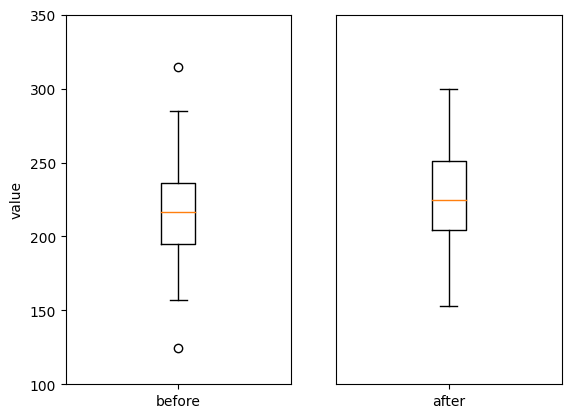

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

fig , ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

### 정규성 검정

In [3]:
from scipy.stats import shapiro

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))


ShapiroResult(statistic=0.9907895922660828, pvalue=0.6065835952758789)
ShapiroResult(statistic=0.9916961193084717, pvalue=0.6923638582229614)


정규성을 만족하므로, 등분산성 검정 진행.

In [5]:
from scipy.stats import levene
print(levene(before,after))

LeveneResult(statistic=0.06427968690211128, pvalue=0.8000741651677987)


등분산성을 가지기는 하나, **대응 표본의 경우 등분산성이 파라미터에 영향을 안 주므로 생략 가능**

In [7]:
from scipy.stats import ttest_rel
print(ttest_rel(before,after))

TtestResult(statistic=-2.5535473487670677, pvalue=0.011926744724546513, df=119)


대응표본 t 검정 결과 pvalue는 0.01로, 유의수준 5%내에서 유의하므로 대립가설을 채택하고 귀무가설을 기각한다.   
즉, `투약 전후에 변화가 있다.`

---

### Question 2

특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라.

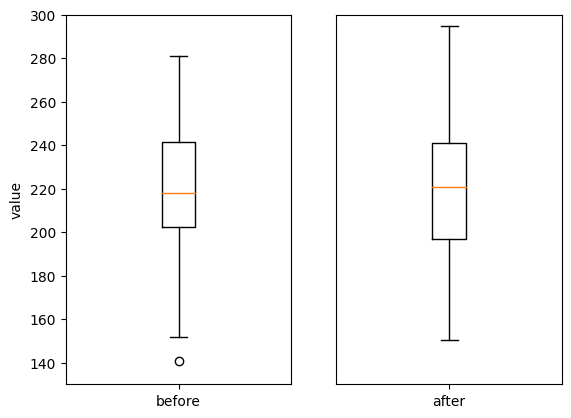

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

### 정규성 검증

In [9]:
from scipy.stats import shapiro

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9920631051063538, pvalue=0.7270199656486511)
ShapiroResult(statistic=0.992019534111023, pvalue=0.7229290008544922)


p-value가 유의수준 0.5에서 대립가설이 유의하지 않으므로 귀무가설 채택.    
즉, 두 그룹은 정규성을 가지고 있음.

In [10]:
from scipy.stats import ttest_rel
print(ttest_rel(before,after))

TtestResult(statistic=0.188900575991026, pvalue=0.8504925317234707, df=119)


대응표본 t 검정 결과 pvalue는 0.85로, 유의수준 5%내에서 유의하지 않으므로 귀무가설을 채택하고 대립가설을 기각한다.   
즉, `투약 전후에 변화가 없다.`

---

### Question 3

특정 집단의 학습 전후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라.

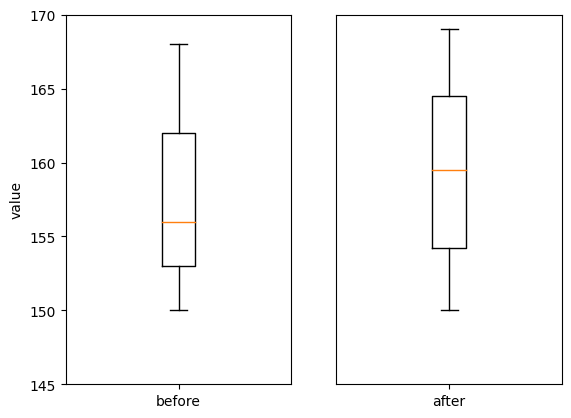

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

### 정규성 검정

In [12]:
from scipy.stats import shapiro

before = df['before']
after = df['after']
print(shapiro(before))
print(shapiro(after))

ShapiroResult(statistic=0.9173730611801147, pvalue=0.0018974003614857793)
ShapiroResult(statistic=0.9448966979980469, pvalue=0.021140215918421745)


p-value가 유의수준 0.5에서 대립가설이 유의하므로 대립가설 채택.    
즉, 두 그룹은 정규성을 가지고 있지 않음.

정규성을 가지지 않으므로 **대응 표본 검정중 비모수 검정인 윌콕슨 부호순위 검정을 진행.**

In [15]:
from scipy.stats import wilcoxon
print(wilcoxon(before,after))

WilcoxonResult(statistic=437.0, pvalue=0.12098409484052809)


대응표본 t 검정 결과 pvalue는 0.12로, 유의수준 5%내에서 유의하지 않으므로 귀무가설을 채택하고 대립가설을 기각한다.   
즉, `투약 전후에 변화가 없다.`

---

### Question 4.

한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.(총 70세트)     
b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라

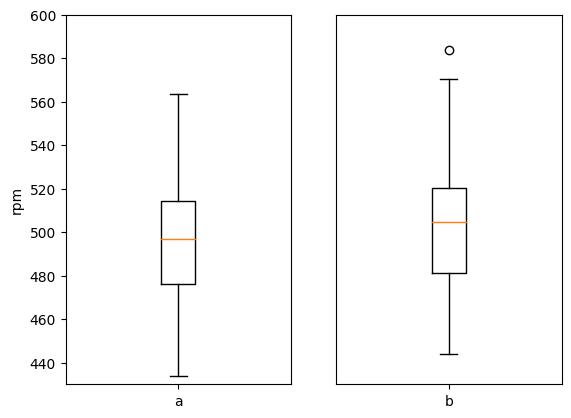

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [19]:
from scipy.stats import shapiro

a = df[df['group']=='a'].rpm
b = df[df['group']=='b'].rpm
print(shapiro(a))
print(shapiro(b))

ShapiroResult(statistic=0.9907217025756836, pvalue=0.8884284496307373)
ShapiroResult(statistic=0.984674870967865, pvalue=0.5505106449127197)


p-value가 유의수준 0.5에서 대립가설이 유의하지 않으므로 귀무가설 채택.    
즉, 두 그룹은 정규성을 가지고 있음.

In [22]:
from scipy.stats import ttest_rel
print(ttest_rel(b,a, alternative='greater')) # b > a인 상황을 대립가설로 지정.

TtestResult(statistic=1.9018108294460812, pvalue=0.030685663464464715, df=69)


대응표본 t 검정 결과 pvalue는 0.03으로, 유의수준 5%내에서 유의하므로 대립가설을 채택하고 귀무가설을 기각한다.   
즉, `b 상황에서의 rpm 값이 a상황 rpm 값보다 크다`